# **Индивидуальное задание по теме: "Применение методов интеллектуального анализа данных для прогностического моделирования с интеграцией визуализации пространственых данных"**

## **I. Общая структура работы**

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **II. Прогнозирование температуры в в различных районах Таиланда на основе пространственно-временных данных с использованием методов машинного обучения**


### 1. **Определение цели**



Прогнозировать температуру в различных районах Таиланда



### 1. **Определение цели**

Определите, что вы хотите предсказать на основе пространственных данных. Это может быть любое явление или процесс, связанный с географической информацией (например, экологические риски, урбанистическое развитие, распространение заболеваний и т.д.).

### 2. **Сбор и подготовка данных**

- **Сбор данных:** Поиск и сбор пространственных данных из надежных источников [(геопорталы, спутниковые данные, открытые базы данных](https://u.to/e_FFIQ)).

- **Предварительная обработка данных:** Очистка данных, устранение пропущенных значений, нормализация данных, геокодирование, работа с координатными системами и проекциями.

- **Разбиение на подвыборки:** Разделение данных на обучающую, валидационную и тестовую выборки.

### 3. **Выбор признаков и моделей**

- **Инженерия признаков:** Определение наиболее значимых признаков из пространственных данных. Возможна генерация новых признаков путем комбинирования исходных данных.

- **Выбор моделей:** Выбор моделей машинного обучения, способных эффективно работать с пространственными данными (например, случайный лес, градиентный бустинг, нейронные сети, геостатистические модели).

### 4. **Разработка аналитической базы**

- **Исследование данных:** Использование инструментов визуализации и анализа пространственных данных для выявления закономерностей и аномалий.

- **Интеграция с ГИС или сервисами интерактивного картографирования:** Работа с такими инструментами, как Folium, GeoPandas, QGIS для визуализации и анализа пространственных данных.

### 5. **Тренировка моделей**

- **Настройка гиперпараметров:** Оптимизация моделей для достижения наилучших результатов.

- **Кросс-валидация:** Проверка стабильности моделей на различных подвыборках данных.

- **Оценка производительности:** Использование метрик (MAE, MSE, RMSE, точность и т.д.) для оценки эффективности моделей.

### 6. **Проверка и оценка моделей**

- **Валидация моделей:** Проверка моделей на валидационном наборе данных.

- **Тестирование моделей:** Финальное тестирование на тестовом наборе данных для оценки обобщающей способности моделей.

### 7. **Развертывание и демонстрация**

- **Создание API-интерфейса для обученной модели:** Реализация API с использованием фреймворков (например, FastAPI, Flask) для предоставления доступа к модели.

- **Разработка графического интерфейса:** Создание пользовательского интерфейса с помощью Streamlit или других инструментов для взаимодействия с моделью и визуализации результатов.

- **Демонстрация работы модели:** Показать пример обращения к модели через API и визуализировать результаты, которые модель возвращает.

### **Инструменты и технологии**

- **Язык программирования:** Python.

- **Библиотеки для машинного обучения:** Scikit-learn, TensorFlow и др.

- **Библиотеки для работы с пространственными данными:** GeoPandas, Folium, Rasterio и др..

- **Фреймворки для создания API:** FastAPI, Flask и др.

- **Инструменты для визуализации:** Matplotlib, Plotly, Streamlit и др.


 2. **Сбор и подготовка данных**



- **Сбор данных:**

  - Геоданные о рельефе, растительности, гидрологии.

  - Климатические данные: температура, влажность, осадки.

  - Исторические данные о случаях возникновения рисков.

- **Предварительная обработка данных:**

  - Объединение данных из разных источников.

  - Обработка и заполнение пропущенных значений.

  - Геопривязка данных и согласование координатных систем.

In [ ]:
!git lfs install
!pip install bayesnf

Git LFS initialized.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 kB 2.0 MB/s eta 0:00:00


In [ ]:
!git clone https://huggingface.co/datasets/WasuratS/ECMWF_Thailand_Land_Air_Temperatures

Cloning into 'ECMWF_Thailand_Land_Air_Temperatures'...
remote: Enumerating objects: 128, done.
remote: Total 128 (delta 0), reused 0 (delta 0), pack-reused 128 (from 1)
Receiving objects: 100% (128/128), 15.42 KiB | 3.08 MiB/s, done.
Resolving deltas: 100% (56/56), done.
Filtering content: 100% (24/24), 8.45 GiB | 48.46 MiB/s, done.


In [19]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import jax

In [21]:
pathDir = './datasets'

In [22]:
df = pd.read_csv(os.path.join(pathDir, 'thailand_air_2023_month.csv'))
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34990 entries, 0 to 34989
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          34990 non-null  object 
 1   latitude      34990 non-null  float64
 2   longitude     34990 non-null  float64
 3   temperatures  34990 non-null  float64
dtypes: float64(3), object(1)
memory usage: 1.1+ MB


In [ ]:
df.head(5)

,date,latitude,longitude,datetime,2m_temperatures_celcius
246813,2022-12-31,20.37,97.96,2023-01-01,14.998932
246814,2022-12-31,20.37,98.06,2023-01-01,16.067780
246815,2022-12-31,20.37,98.16,2023-01-01,16.222565
246816,2022-12-31,20.37,98.26,2023-01-01,15.500397
246817,2022-12-31,20.37,98.36,2023-01-01,14.559967


In [ ]:
def check_missing_data(folder_path):
    """
    Проверяет все датасеты в указанной папке на наличие пропущенных данных.

    :param folder_path: Путь до папки с датасетами.
    """
    # Получаем список всех файлов в папке
    files = os.listdir(folder_path)

    # Проходим по каждому файлу
    for file in files:
        # Проверяем, что файл имеет расширение .parquet
        if file.endswith('.parquet'):

            file_path = os.path.join(folder_path, file)
            print(f"Проверка файла: {file}")

            # Загружаем датасет
            df = pd.read_parquet(file_path)

            # Проверяем наличие пропущенных данных
            missing_data = df.isnull().sum()

            if missing_data.any():
                print(f"Найдены пропущенные данные в файле {file}:")
                print(missing_data)
            else:
                print(f"В файле {file} нет пропущенных данных.")
            print("\n" + "="*50 + "\n")

In [ ]:
check_missing_data(pathDir)

Проверка файла: 2016_hourly_2m_land_temperatures_TH.parquet
В файле 2016_hourly_2m_land_temperatures_TH.parquet нет пропущенных данных.


Проверка файла: 2012_hourly_2m_land_temperatures_TH.parquet
В файле 2012_hourly_2m_land_temperatures_TH.parquet нет пропущенных данных.


Проверка файла: 2004_hourly_2m_land_temperatures_TH.parquet
В файле 2004_hourly_2m_land_temperatures_TH.parquet нет пропущенных данных.


Проверка файла: 2013_hourly_2m_land_temperatures_TH.parquet
В файле 2013_hourly_2m_land_temperatures_TH.parquet нет пропущенных данных.


Проверка файла: 2014_hourly_2m_land_temperatures_TH.parquet
В файле 2014_hourly_2m_land_temperatures_TH.parquet нет пропущенных данных.


Проверка файла: 2000_hourly_2m_land_temperatures_TH.parquet
В файле 2000_hourly_2m_land_temperatures_TH.parquet нет пропущенных данных.


Проверка файла: 2019_hourly_2m_land_temperatures_TH.parquet
В файле 2019_hourly_2m_land_temperatures_TH.parquet нет пропущенных данных.


Проверка файла: 2009_hourly_2m_lan

In [ ]:
print(f'Min date: {df.date.min()}')
print(f'Max date: {df.date.max()}')

Min date: 2022-12-31 00:00:00
Max date: 2023-05-09 00:00:00


/tmp/ipykernel_16534/3153163064.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


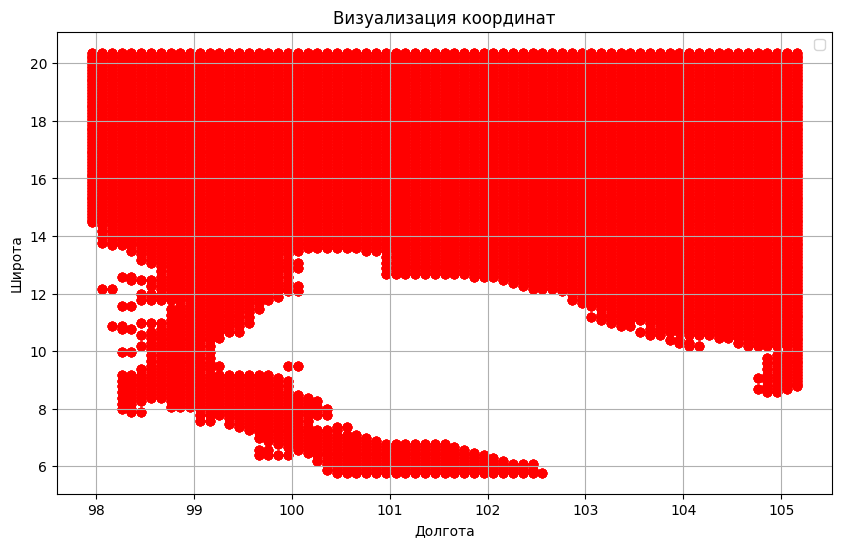

In [23]:
plt.figure(figsize=(10, 6))
plt.scatter(df.longitude, df.latitude, c='red', marker='o')

# Настройка графика
plt.title('Визуализация координат')
plt.xlabel('Долгота')
plt.ylabel('Широта')
plt.legend()
plt.grid(True)
plt.show()

In [4]:
df = df.sort_values(['latitude', 'longitude'])

In [5]:
# Группируем по date, latitude, longitude и считаем среднее значение
result = df.groupby(['date', 'latitude', 'longitude'], as_index=False)['2m_temperatures_celcius'].mean()

# Переименовываем колонку
result = result.rename(columns={'2m_temperatures_celcius': 'temperatures'}).sort_values(['latitude', 'longitude'])

# Результат
print(result)

             date  latitude  longitude  temperatures
0      2022-12-31      5.77     100.46     21.721588
6998   2023-01-01      5.77     100.46     25.781321
13996  2023-01-02      5.77     100.46     26.110586
20994  2023-01-03      5.77     100.46     26.219748
27992  2023-01-04      5.77     100.46     25.489676
...           ...       ...        ...           ...
881747 2023-05-05     20.37     105.16     30.171957
888745 2023-05-06     20.37     105.16     30.925314
895743 2023-05-07     20.37     105.16     29.551096
902741 2023-05-08     20.37     105.16     22.791880
909739 2023-05-09     20.37     105.16     24.094917

[909740 rows x 4 columns]


In [6]:
# Оставляем первую запись в месяце
df_final = result[result['date'].dt.day == 1]

In [14]:
# Оставляем каждую седьмую запись
df_final = result.iloc[::7]
df_final

,date,latitude,longitude,temperatures
0,2022-12-31,5.77,100.46,21.721588
48986,2023-01-07,5.77,100.46,24.139069
97972,2023-01-14,5.77,100.46,26.068939
146958,2023-01-21,5.77,100.46,24.851664
195944,2023-01-28,5.77,100.46,25.236124
...,...,...,...,...
678805,2023-04-06,20.37,105.16,25.618774
727791,2023-04-13,20.37,105.16,25.221567
776777,2023-04-20,20.37,105.16,28.111460
825763,2023-04-27,20.37,105.16,24.029236


In [7]:
df_final.to_csv('/content/drive/MyDrive/maga/data_mining/datasets/thailand_air_2023_month.csv', index=False)

In [15]:
df_final.to_csv('/content/drive/MyDrive/maga/data_mining/datasets/thailand_air_2023_weekly.csv', index=False)

In [25]:
# Удаление дубликатов по парам latitude и longitude
unique_pairs = df[['latitude', 'longitude']].drop_duplicates()

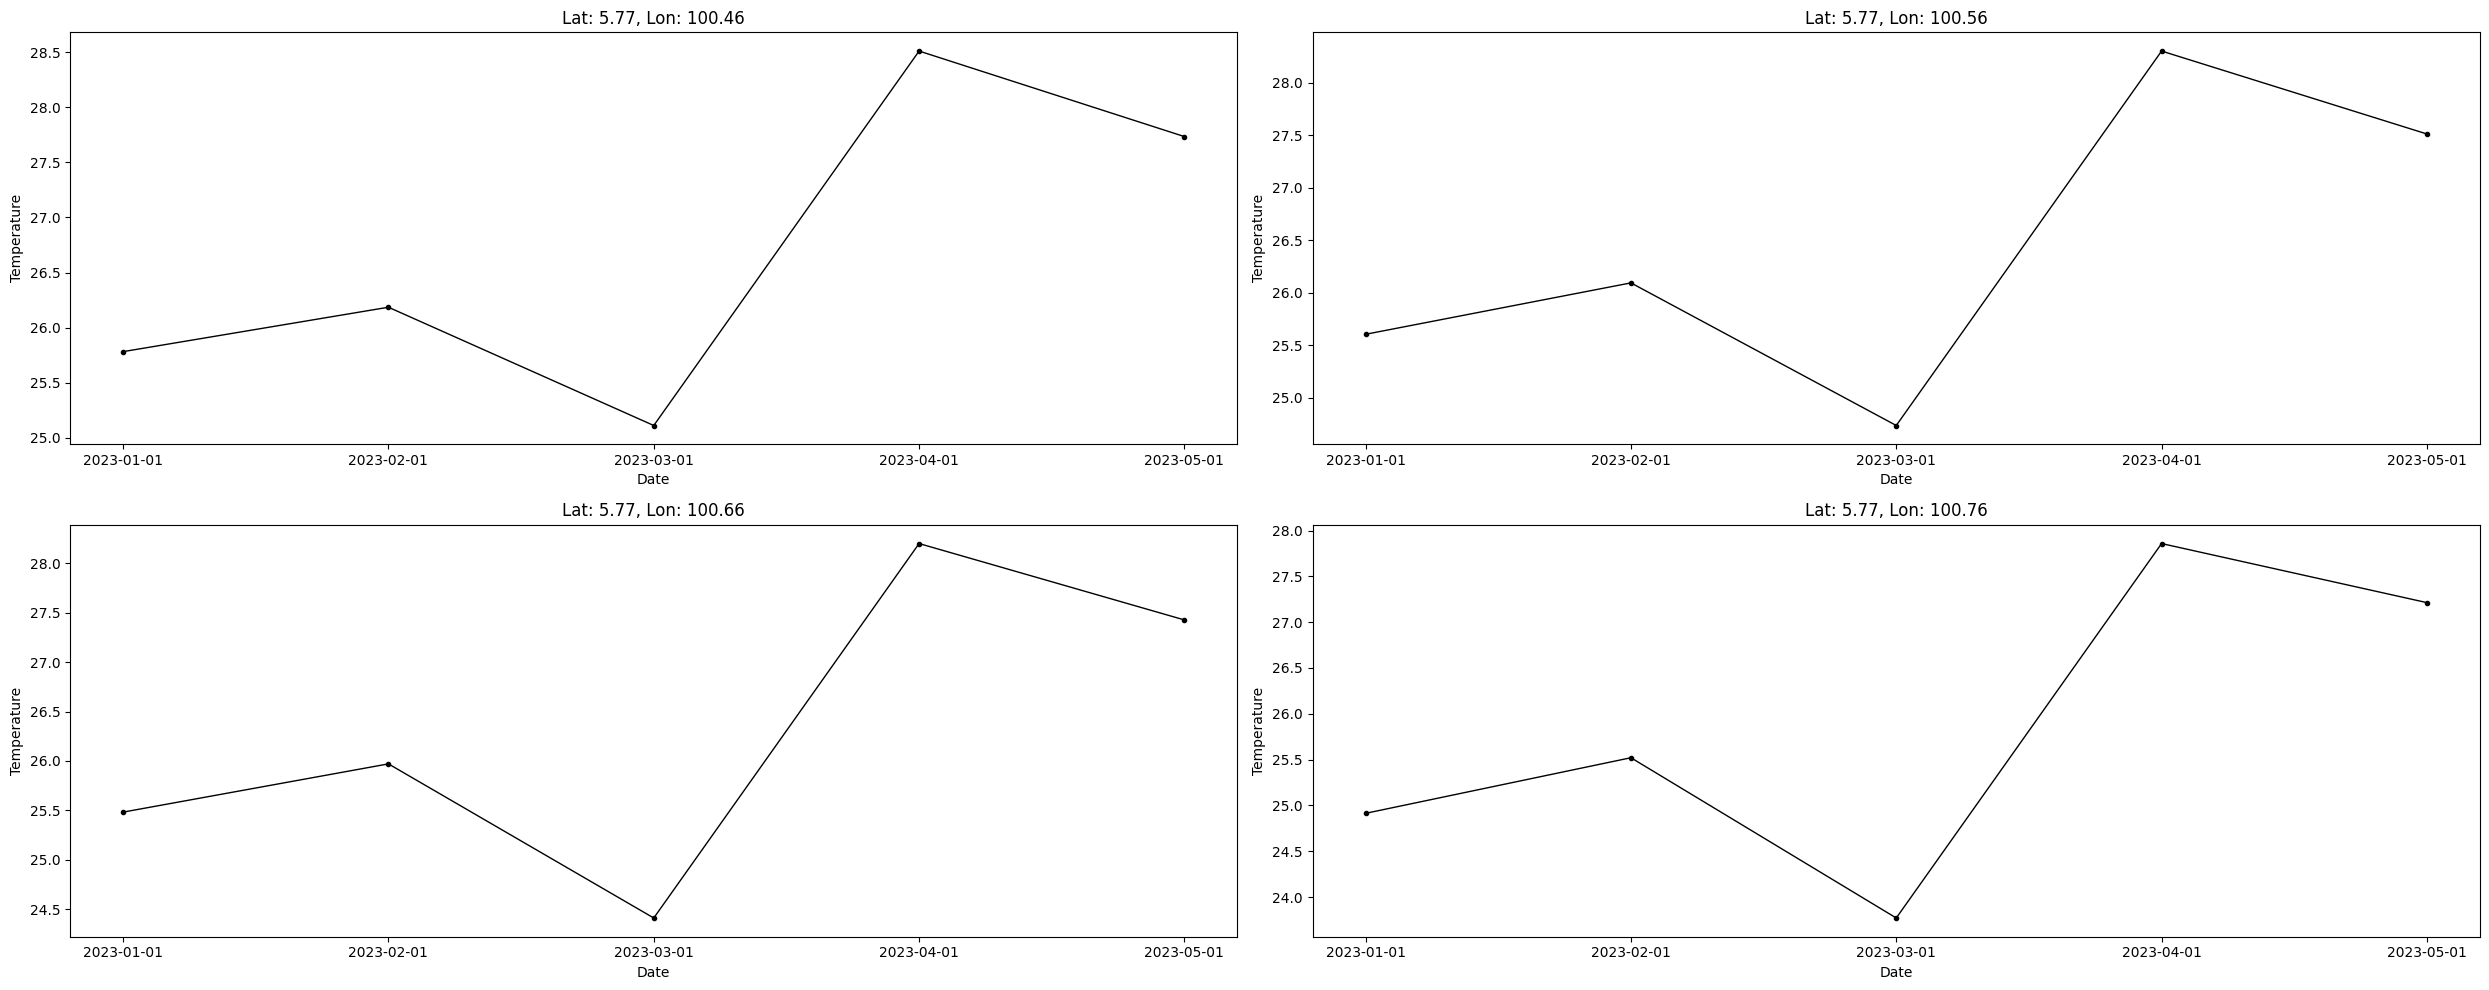

In [27]:
# Ограничиваем количество графиков
N = 4  # Количество графиков, которые вы хотите отобразить
unique_pairs = unique_pairs[:N]

# Создаем сетку графиков
ncols = 2  # Количество столбцов
nrows = (len(unique_pairs) + ncols - 1) // ncols  # Количество строк
fig, axes = plt.subplots(ncols=ncols, nrows=nrows, tight_layout=True, figsize=(25, 5 * nrows))

if nrows == 1:
    axes = axes.reshape(1, -1)

# Построение графиков
for ax, (latitude, longitude) in zip(axes.flat, unique_pairs.itertuples(index=False)):
    df_location = df[(df.latitude == latitude) & (df.longitude == longitude)]
    ax.plot(df_location.date, df_location['temperatures'], marker='.', color='k', linewidth=1)
    ax.set_title(f'Lat: {latitude:.2f}, Lon: {longitude:.2f}')
    ax.set_xlabel('Date')
    ax.set_ylabel('Temperature')

# Удаление пустых графиков, если количество графиков меньше, чем nrows * ncols
for ax in axes.flat[len(unique_pairs):]:
    ax.remove()

plt.show()

In [28]:
# Подготовка train и test выборок

df_final = df.sort_values(['date', 'latitude', 'longitude'])

# Вычисление количества строк для последних 15%
n_rows = len(df_final)
last_15_percent = int(n_rows * 0.15)

df_test = df_final.iloc[-last_15_percent:]

df_train = df_final.iloc[:-last_15_percent]

In [29]:
display(df_train.shape, df_test.shape)

(29742, 4)

(5248, 4)

In [39]:
from bayesnf.spatiotemporal import BayesianNeuralFieldMAP

model = BayesianNeuralFieldMAP(
    width=256,
    depth=2,
    freq='M',
    seasonality_periods=['Y'],
    num_seasonal_harmonics=[0],
    feature_cols=['date', 'latitude', 'longitude'],
    target_col='temperatures',
    observation_model='NORMAL',
    timetype='index',
    standardize=['latitude', 'longitude'],
    interactions=[(0, 1), (0, 2), (1, 2)],
)

In [41]:
df_train['date'] = pd.to_datetime(df_train['date'])

model = model.fit(
    df_train,
    seed=jax.random.PRNGKey(0),
    ensemble_size=64,
    num_epochs=1000,
)

/tmp/ipykernel_16534/1451325051.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['date'] = pd.to_datetime(df_train['date'])
/home/artem/projects/data_mining/.venv/lib/python3.10/site-packages/bayesnf/spatiotemporal.py:52: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  four_years = pd.date_range('2020-01-01', periods=5, freq='Y')


XlaRuntimeError: FAILED_PRECONDITION: Buffer Definition Event: Error preparing computation: %sOut of memory allocating 24316320544 bytes.

In [ ]:


def process_datasets(folder_path):
    """
    Обрабатывает данные и делит данные на df_train, df_test

    :param folder_path: Путь до папки с датасетами.
    :return: df_train и df_test
    """

    # Создаем пустые DataFrame
    mergered_dataset = pd.DataFrame()

    # Получаем список всех файлов в папке
    files = sorted(os.listdir(folder_path))

    # Проходим по каждому файлу
    for file in files:
        # Проверяем, что файл имеет расширение .parquet
        if file.endswith('.parquet'):
            file_path = os.path.join(folder_path, file)
            print(f"Обработка файла: {file}")

            # Загружаем датасет
            df = pd.read_parquet(file_path)

            mergered_dataset = pd.concat([mergered_dataset, df], ignore_index=True)

    # Сортируем датасет
    mergered_dataset = mergered_dataset.sort_values(by=['date'])
    mergered_dataset = mergered_dataset.rename(columns={'2m_temperatures_celcius': 'temperatures'})

    # Вычисление количества строк для последних 15%
    n_rows = len(mergered_dataset)
    last_15_percent = int(n_rows * 0.15)

    df_test = mergered_dataset.iloc[-last_15_percent:]

    df_train = mergered_dataset.iloc[:-last_15_percent]

    # Возвращаем итоговый датасет
    return df_train.sort_values(by=['longitude', 'latitude', 'date']), df_test.sort_values(by=['longitude', 'latitude', 'date'])

In [ ]:
df_train, df_test = process_datasets(pathDir)
display(df_train, df_test)

Обработка файла: 2000_hourly_2m_land_temperatures_TH.parquet
Обработка файла: 2001_hourly_2m_land_temperatures_TH.parquet


### 3. **Выбор признаков и моделей**



- **Инженерия признаков:**

  - Создание новых признаков, например, расстояние до водоемов, плотность растительности.

- **Выбор моделей:**

  - Градиентный бустинг, случайный лес и прочие, для работы с табличными данными.

  - Сверточные нейронные сети для анализа растров.

### 4. **Разработка аналитической базы**



- **Исследование данных:**

  - Анализ корреляций между признаками.

  - Визуализация данных на карте для выявления пространственных закономерностей.

### 5. **Тренировка моделей**



- **Настройка гиперпараметров:**

  - Использование методов кросс-валидации и поиска по сетке (Grid Search).

- **Оценка производительности:**

  - ROC-кривые и матрицы ошибок для классификации рисков.

### 6. **Проверка и оценка моделей**



- **Валидация:**

  - Проверка модели на отдельных регионах.







### 7. **Развертывание и демонстрация**











- **Создание API:** Реализация сервиса, принимающего запросы с геоданными и возвращающего прогноз риска.

- **Графический интерфейс:**

  - Разработка веб-приложения в Streamlit для визуализации карты с отмеченными зонами риска.

### **III. Примерный перечень тем**



1. **Классификация объектов на спутниковых изображениях с использованием методов машинного обучения**

   Применение алгоритмов глубокого обучения для распознавания и классификации различных объектов на спутниковых снимках (например, здания, дороги, водоемы) с последующей визуализацией результатов на географических картах.

2. **Прогнозирование и визуализация изменений землепользования и урбанизации**

   Использование методов анализа данных и растровых изображений для прогнозирования изменений в землепользовании, включая процессы урбанизации и вырубки лесов, с интеграцией результатов в интерактивные карты.

3. **Оценка экологического состояния территорий и экологических рисков с помощью кластеризации пространственных данных**

   Применение методов кластеризации для сегментации территорий по экологическому состоянию, учитывая различные показатели (например, качество воздуха, воды, почвы), с последующей визуализацией на картах.

4. **Анализ пространственного распределения преступности в городах**

   Использование методов интеллектуального анализа данных для выявления и визуализации горячих точек преступности с целью поддержки правоохранительных органов в принятии решений.

5. **Оптимизация маршрутов и транспортных потоков с использованием пространственного анализа**

   Применение алгоритмов оптимизации на пространственных данных для построения наиболее эффективных маршрутов доставки и прогнозирования загруженности дорог, с визуализацией результатов на интерактивных картах.

6. **Картирование и анализ биологического разнообразия**

   Использование пространственных данных для оценки и визуализации распределения биологических видов с целью поддержки мероприятий по сохранению биоразнообразия.

7. **Прогнозирование и визуализация риска эрозии почв**

   Применение методов анализа данных для оценки риска эрозии почв в различных регионах с визуализацией результатов на географических картах.

8. **Анализ и визуализация доступности инфраструктуры**

   Использование пространственных данных для оценки доступности важных объектов инфраструктуры (больницы, школы, магазины) для населения с визуализацией на картах.

9. **Прогнозирование влияния климатических изменений на экосистемы**

   Моделирование потенциальных изменений экосистем под воздействием климатических факторов с визуализацией результатов на пространственных картах.

10. **Классификация и анализ качества сельскохозяйственных угодий и прогнозирование урожайности**

    Применение методов классификации для оценки состояния и продуктивности сельскохозяйственных земель, прогнозирование урожайности с визуализацией данных на географических картах.

11. **Мониторинг изменений земного покрова с использованием спутниковых снимков**

    Использование методов классификации растровых данных для идентификации типов земного покрова (лес, вода, урбанизированные территории) и мониторинга их изменений с визуализацией результатов на картах.

12. **Классификация и прогнозирование зон природных рисков на основе растровых данных**

    Использование растровых данных для классификации территорий по степени риска (например, оползни, наводнения), прогнозирование изменений этих зон и визуализация на интерактивных картах.

13. **Прогностическое моделирование распространения пожаров**

    Применение методов машинного обучения и растровых данных для оценки вероятности возникновения пожаров, прогнозирования их распространения и визуализации результатов на картах.

14. **Классификация растровых данных для мониторинга изменений в экосистемах**

    Использование методов классификации растров для обнаружения и прогнозирования изменений в экосистемах (например, вырубка лесов, высыхание водоемов) с последующей визуализацией результатов.

15. **Применение методов максимальной энтропии (MaxEnt) для прогнозирования присутствия явлений**

    Использование модели MaxEnt для оценки вероятности присутствия различных явлений на основе пространственных растровых данных.

16. **Прогнозирование и визуализация уровня загрязнения воздуха в городах**

    Разработка модели для предсказания уровня загрязнения воздуха в различных районах города с использованием методов машинного обучения и визуализацией результатов на интерактивной карте.

17. **Моделирование распространения загрязняющих веществ в атмосфере**

    Использование пространственных данных и методов анализа для прогнозирования распространения загрязняющих веществ с визуализацией на географических картах.

18. **Прогнозирование спроса на общественный транспорт с использованием пространственных данных**

    Анализ пространственных данных для предсказания зон с повышенным спросом на общественный транспорт в разное время суток, с визуализацией результатов для оптимизации маршрутов и графиков движения.

19. **Оптимизация размещения торговых точек с интеграцией пространственных данных**

    Применение методов анализа данных для определения оптимальных мест расположения новых магазинов или сервисов, учитывая демографические данные, потоки людей и существующую инфраструктуру, с визуализацией на интерактивной карте.

20. **Прогностическое моделирование распространения инфекционных заболеваний**

    Использование методов анализа пространственных данных для предсказания распространения заболеваний по регионам с визуализацией на интерактивных картах, актуально для общественного здравоохранения.

21. **Моделирование и визуализация риска затопления территорий**

    Применение гидрологических моделей и метеорологических данных для прогнозирования зон возможного подтопления с интеграцией результатов в системы визуализации пространственных данных.

22. **Анализ и прогнозирование дорожного трафика с использованием пространственных данных**

    Использование данных о перемещении транспортных средств для предсказания загруженности дорог в разные периоды времени с визуализацией результатов на картах для оптимизации транспортных потоков.


## **IV. Требования**






### **Требования к источникам данных**

- **Актуальность и достоверность:** Используйте актуальные и проверенные пространственные данные.

- **Доступность:** Предпочтительно использовать открытые данные или данные, полученные через API.



### **Требования к данным и визуализации**

- **Пространственная привязка:** Все данные должны иметь координаты или другую географическую информацию.

- **Визуализация:** Результаты должны быть визуализированы на карте с возможностью интерактивного взаимодействия.

### **Примеры**

Визуализация может быть выполнена в любой среде, позволяющей создавать тематическую карту с динамическим отображением данных по временным меткам, например в среде [Folium](https://python-visualization.github.io/folium/latest/user_guide.html)



#### Пример №1:

[Документация](https://python-visualization.github.io/folium/latest/user_guide/plugins/timestamped_geojson.html)

In [ ]:
import folium
from folium.plugins import TimestampedGeoJson

m = folium.Map(location=[35.68159659061569, 139.76451516151428], zoom_start=16)


lines = [
    {
        "coordinates": [
            [139.76451516151428, 35.68159659061569],
            [139.75964426994324, 35.682590062684206],
        ],
        "dates": ["2017-06-02T00:00:00", "2017-06-02T00:10:00"],
        "color": "red",
    },
    {
        "coordinates": [
            [139.75964426994324, 35.682590062684206],
            [139.7575843334198, 35.679505030038506],
        ],
        "dates": ["2017-06-02T00:10:00", "2017-06-02T00:20:00"],
        "color": "blue",
    },
    {
        "coordinates": [
            [139.7575843334198, 35.679505030038506],
            [139.76337790489197, 35.678040905014065],
        ],
        "dates": ["2017-06-02T00:20:00", "2017-06-02T00:30:00"],
        "color": "green",
        "weight": 15,
    },
    {
        "coordinates": [
            [139.76337790489197, 35.678040905014065],
            [139.76451516151428, 35.68159659061569],
        ],
        "dates": ["2017-06-02T00:30:00", "2017-06-02T00:40:00"],
        "color": "#FFFFFF",
    },
]

features = [
    {
        "type": "Feature",
        "geometry": {
            "type": "LineString",
            "coordinates": line["coordinates"],
        },
        "properties": {
            "times": line["dates"],
            "style": {
                "color": line["color"],
                "weight": line["weight"] if "weight" in line else 5,
            },
        },
    }
    for line in lines
]

TimestampedGeoJson(
    {
        "type": "FeatureCollection",
        "features": features,
    },
    period="PT1M",
    add_last_point=True,
).add_to(m)

m

#### Пример 2

[Документация](https://python-visualization.github.io/folium/latest/user_guide/plugins/WmsTimeDimension.html)

In [ ]:
!pip install owslib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 221.1/221.1 kB 4.6 MB/s eta 0:00:00


In [ ]:
from owslib.wms import WebMapService
from folium.plugins import TimestampedWmsTileLayers


url = "https://pae-paha.pacioos.hawaii.edu/thredds/wms/dhw_5km?service=WMS"

web_map_services = WebMapService(url)

print("\n".join(web_map_services.contents.keys()))


layer = "CRW_SST"
wms = web_map_services.contents[layer]

name = wms.title

lon = (wms.boundingBox[0] + wms.boundingBox[2]) / 2.0
lat = (wms.boundingBox[1] + wms.boundingBox[3]) / 2.0
center = lat, lon

time_interval = "{0}/{1}".format(
    wms.timepositions[0].strip(), wms.timepositions[-1].strip()
)
style = "boxfill/sst_36"

if style not in wms.styles:
    style = None

m = folium.Map(location=[-40, -50], zoom_start=5)

wms_tile_layer = folium.WmsTileLayer(
    url=url,
    name=name,
    styles=style,
    fmt="image/png",
    transparent=True,
    layers=layer,
    overlay=True,
    COLORSCALERANGE="1.2,28",
).add_to(m)

TimestampedWmsTileLayers(
    wms_tile_layer,
    period="PT1H",
    time_interval=time_interval,
).add_to(m)

folium.LayerControl().add_to(m)

m

CRW_DHW
CRW_DHW_mask
CRW_HOTSPOT
CRW_HOTSPOT_mask
CRW_SSTANOMALY
CRW_SSTANOMALY_mask
CRW_BAA
CRW_BAA_mask
CRW_BAA_7D_MAX
CRW_BAA_7D_MAX_mask
CRW_SEAICE
CRW_SST


#### Пример №3. Готовый проект с визуализацией пространственных данных на Python

Ссылка: https://github.com/MoustafaShaaban/Django_and_Folium/

## **VI. Порядок выполнения работы**



1. **Выбор темы** из предложенных или собственной.

2. **Выбор источников данных**, поиск и анализ доступных датасетов.

3. **Сбор данных** и их предобработка.

4. **Разведочный анализ данных**, визуализация, выявление закономерностей.

5. **Выбор признаков** для модели и проведение инженерии признаков.

6. **Выбор и обучение моделей** машинного обучения.

7. **Анализ результатов**, сравнение моделей по нескольким метрикам (чем больше, тем лучше), выбор наилучшей.

8. **Визуализация данных и прогнозов** на интерактивной карте.

9. **Создание API-интерфейса** для обученной модели.

10. **Разработка графического интерфейса** для взаимодействия с моделью.

11. **Демонстрация работы модели**, подготовка инструкций по использованию.

## **V. Результаты выполнения работы**








### 1. **Отчет по работе**



Детальное описание всех этапов работы, включая анализ данных, описание моделей, результаты и выводы.

### 2. **Готовый проект с инструкцией**

- Ссылка на репозиторий с кодом проекта.

- Инструкция по развертыванию и использованию приложения ([реализовать в файле README.MD](https://nuancesprog.ru/p/7105/)).

- Демонстрация работы модели (скриншоты, видео).

**Примечания:**

1. Рекомендуемый сервис для развертывания API: [render.com](https://render.com/), также проект может быть упакован в Docker-контейнер для удобства развертывания.

2. В качестве API-фреймворка рекомендуется использовать FastAPI из-за его простоты и эффективности.

3. Графический интерфейс можно реализовать в Streamlit или другой подходящей платформе. ([Пример](https://www.youtube.com/watch?v=hn2WqRX75DI))

P.S.: В крайнем случае Вы можете просто показать в Colab, как обращаетесь к модели через API, а затем вручную визуализируете результаты на интерактивной карте с помощью Folium или Leafmap.